In [2]:
# Purpose : To find the relation between Garmin and Vendor and minimize Garmin gap

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_excel('data2.xlsx')

In [3]:
df.head()

,Garmin Gap,Garmin Flush,Vendor Flatness,Vendor Profile of Surface
0,1.10,0.5000,0.1807,0.23940
1,1.05,0.5175,0.1897,0.23255
2,0.00,0.5175,0.1682,-0.23300
3,0.90,0.5150,0.1707,0.23540
4,1.00,0.4800,0.3512,0.27395


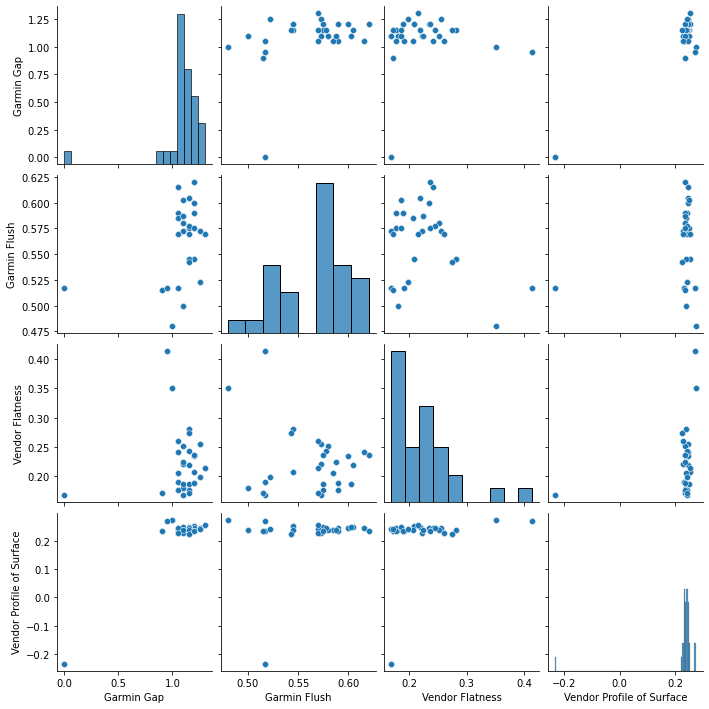

In [4]:
sns.pairplot(df)

In [1]:
# Seems Vendor Profile of Surface will affect Garmin Gap

In [6]:
df.columns

Index(['Garmin Gap', 'Garmin Flush', 'Vendor Flatness',
       'Vendor Profile of Surface'],
      dtype='object')

In [7]:
X = df[['Vendor Profile of Surface', 'Vendor Flatness']]
y = df['Garmin Gap']

In [8]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
lm = LinearRegression()

In [10]:
lm.fit(X_train, y_train)

LinearRegression()

In [11]:
lm.coef_

array([ 2.40896232, -0.42122481])

In [12]:
dfc = pd.DataFrame(lm.coef_, index = X.columns, columns=['Coff'])
dfc

,Coff
Vendor Profile of Surface,2.408962
Vendor Flatness,-0.421225


In [13]:
lm.score(X_train, y_train)

0.8392546412893181

In [14]:
# Predictions

In [15]:
predictions = lm.predict(X_test)

<AxesSubplot:ylabel='Garmin Gap'>

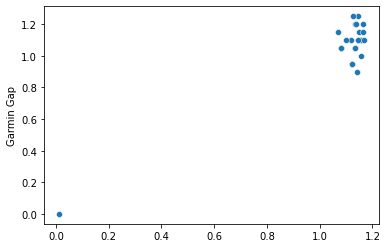

In [16]:
sns.scatterplot(x = predictions, y = y_test)

<AxesSubplot:xlabel='Garmin Gap', ylabel='Count'>

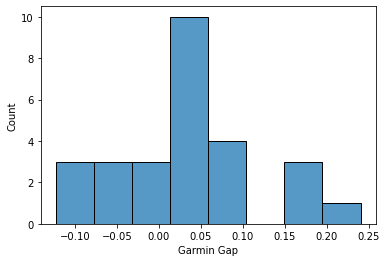

In [17]:
sns.histplot(predictions-y_test)

In [3]:
# Residuals distribute as normal.

In [1]:
#Conclusion : Vendor Profile of Surface will hightly affect Garmin Gap.